# **Email Spam Filter**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [7]:
# Load the dataset
data = pd.read_csv('/content/archive (2).zip')
texts = data['text']
labels = data['spam']

In [11]:
# Preprocessing: Filling missing values and converting text to lower case
data['text'] = data['text'].fillna('').str.lower()

# Feature extraction using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42) # Changed 'X_tfidata' to 'X_tfidf'

# Training the model using Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Predicting the test set results
y_pred = nb_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9781849912739965
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.93      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[852   4]
 [ 21 269]]


In [15]:
# Most common words
all_words = ' '.join(data['text']).split()
word_counts = Counter(all_words)
print("\nMost Common Words:\n", word_counts.most_common(10))

# Least common words
all_words = ' '.join(data['text']).split()
word_counts = Counter(all_words)
print("\nLeast Common Words:\n", word_counts.most_common()[-10:])


Most Common Words:
 [('-', 105222), ('.', 92494), (',', 61143), ('the', 50110), (':', 42370), ('to', 41736), ('/', 40311), ('and', 27478), ('of', 23757), ('>', 22252)]

Least Common Words:
 [('etringer', 1), ('jonalan', 1), ('laird', 1), ('hrach', 1), ('numerate', 1), ('selectable', 1), ('hypercube', 1), ('toughest', 1), ('critic', 1), ('desiring', 1)]


In [16]:
cv = CountVectorizer()
word_counts_matrix = cv.fit_transform(data['text'])
tfidf_transformer = TfidfTransformer()
word_tfidf_matrix = tfidf_transformer.fit_transform(word_counts_matrix)
word_tfidf = pd.DataFrame(word_tfidf_matrix.toarray(), columns=cv.get_feature_names_out())
word_tfidf['spam'] = data['spam'].values
spam_words_tfidf = word_tfidf[word_tfidf['spam'] == 1].drop(columns=['spam'])
ham_words_tfidf = word_tfidf[word_tfidf['spam'] == 0].drop(columns=['spam'])
spam_avg_tfidf = spam_words_tfidf.mean(axis=0).sort_values(ascending=False)[:10]
ham_avg_tfidf = ham_words_tfidf.mean(axis=0).sort_values(ascending=False)[:10]
print("\nTop Spam Words by TF-IDF:\n", spam_avg_tfidf)
print("\nTop Ham Words by TF-IDF:\n", ham_avg_tfidf)


Top Spam Words by TF-IDF:
 to      0.067395
the     0.062210
your    0.060170
you     0.055285
and     0.052378
of      0.046173
is      0.033458
in      0.033335
for     0.031484
this    0.028842
dtype: float64

Top Ham Words by TF-IDF:
 the      0.099738
to       0.085799
and      0.056736
ect      0.055071
enron    0.049904
you      0.049469
of       0.048748
vince    0.042355
for      0.042178
in       0.041575
dtype: float64


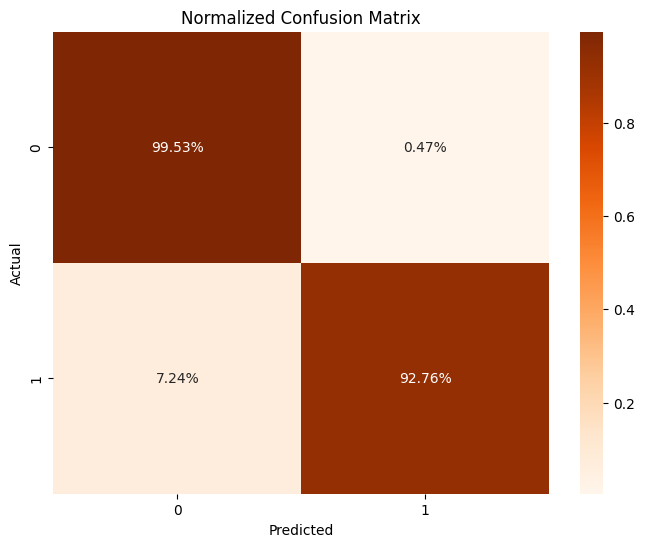

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt='.2%', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

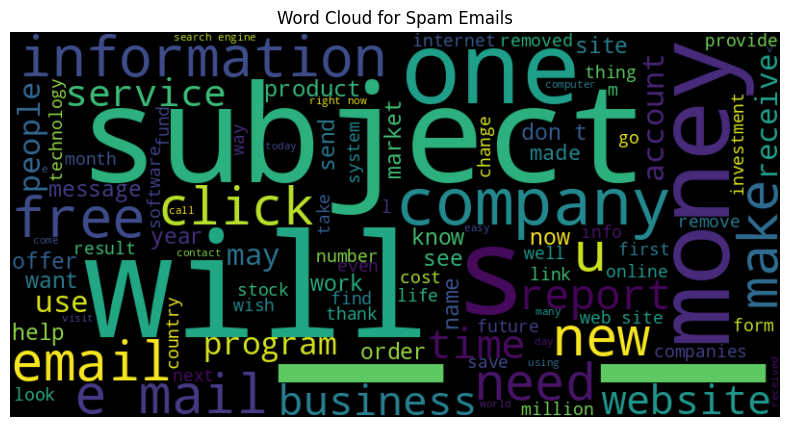

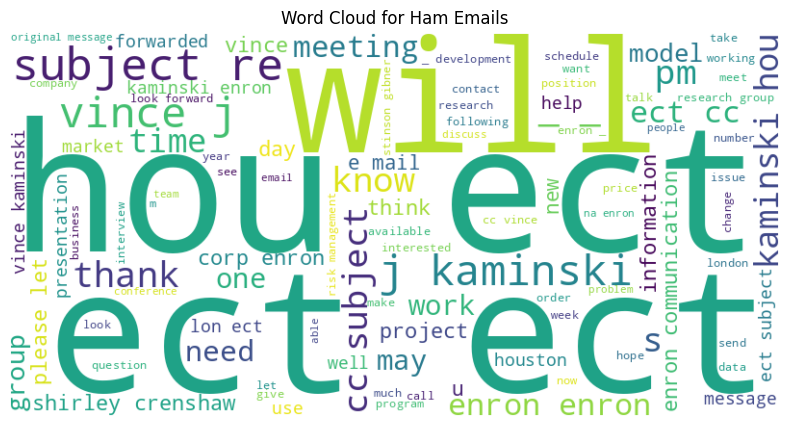

In [18]:
# Generate word cloud for spam emails
spam_words = ' '.join(list(data[data['spam'] == 1]['text']))
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

# Generate word cloud for ham emails
ham_words = ' '.join(list(data[data['spam'] == 0]['text']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()


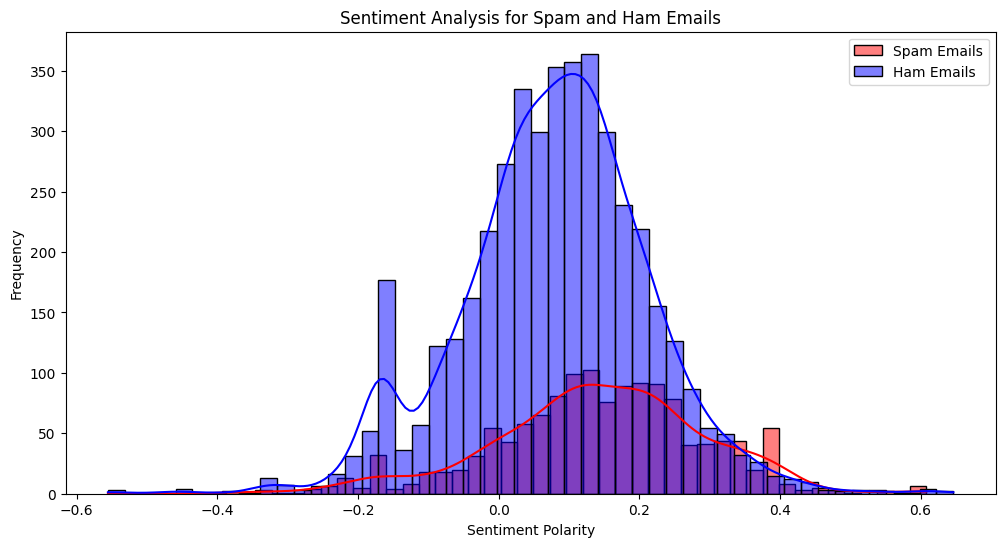

In [19]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Adding sentiment scores to the dataframe
data['sentiment'] = data['text'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.histplot(data[data['spam'] == 1]['sentiment'], color='red', bins=50, kde=True, label='Spam Emails')
sns.histplot(data[data['spam'] == 0]['sentiment'], color='blue', bins=50, kde=True, label='Ham Emails')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis for Spam and Ham Emails')
plt.legend()
plt.show()

<ipython-input-20-06033b8b6f9b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Word', data=spam_word_freq_df, palette='Reds_r')


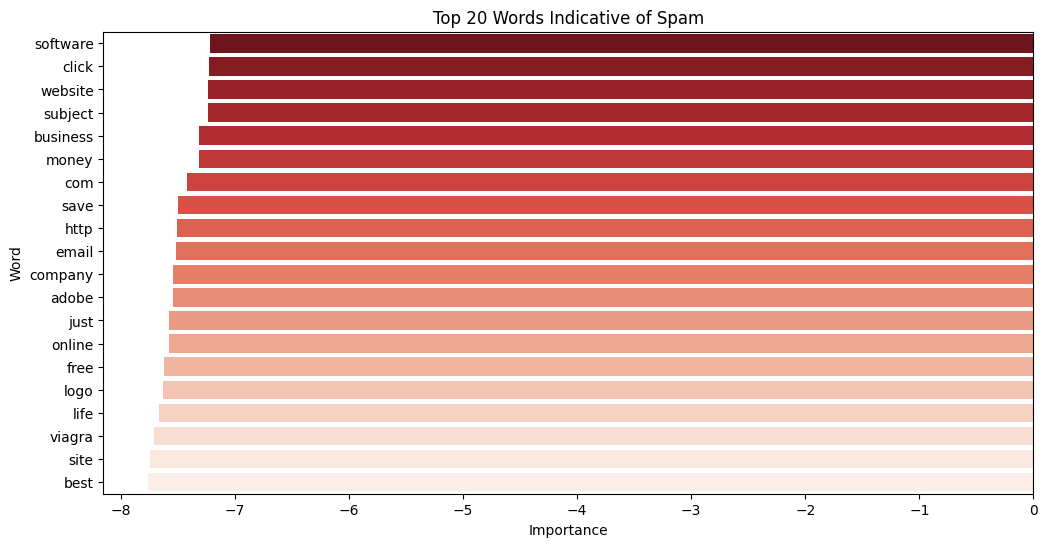

<ipython-input-20-06033b8b6f9b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Word', data=ham_word_freq_df, palette='Blues_r')


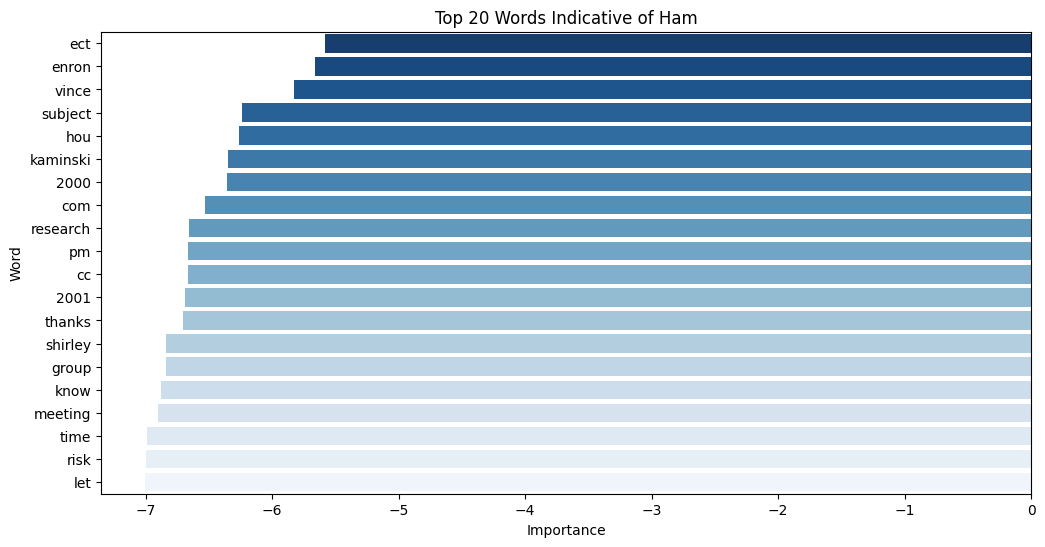

In [20]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Fit a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_tfidf, labels)

# Identify the most indicative words for spam and ham
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_features = nb_model.feature_log_prob_[1].argsort()
ham_features = nb_model.feature_log_prob_[0].argsort()

top_spam_words = [feature_names[i] for i in spam_features[-20:]]
top_ham_words = [feature_names[i] for i in ham_features[-20:]]

spam_word_freq = [(word, nb_model.feature_log_prob_[1, feature_names == word][0]) for word in top_spam_words]
spam_word_freq_df = pd.DataFrame(spam_word_freq, columns=['Word', 'Importance']).sort_values(by='Importance', ascending=False)

ham_word_freq = [(word, nb_model.feature_log_prob_[0, feature_names == word][0]) for word in top_ham_words]
ham_word_freq_df = pd.DataFrame(ham_word_freq, columns=['Word', 'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Word', data=spam_word_freq_df, palette='Reds_r')
plt.title('Top 20 Words Indicative of Spam')
plt.xlabel('Importance')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Word', data=ham_word_freq_df, palette='Blues_r')
plt.title('Top 20 Words Indicative of Ham')
plt.xlabel('Importance')
plt.ylabel('Word')
plt.show()


<Figure size 1000x600 with 0 Axes>

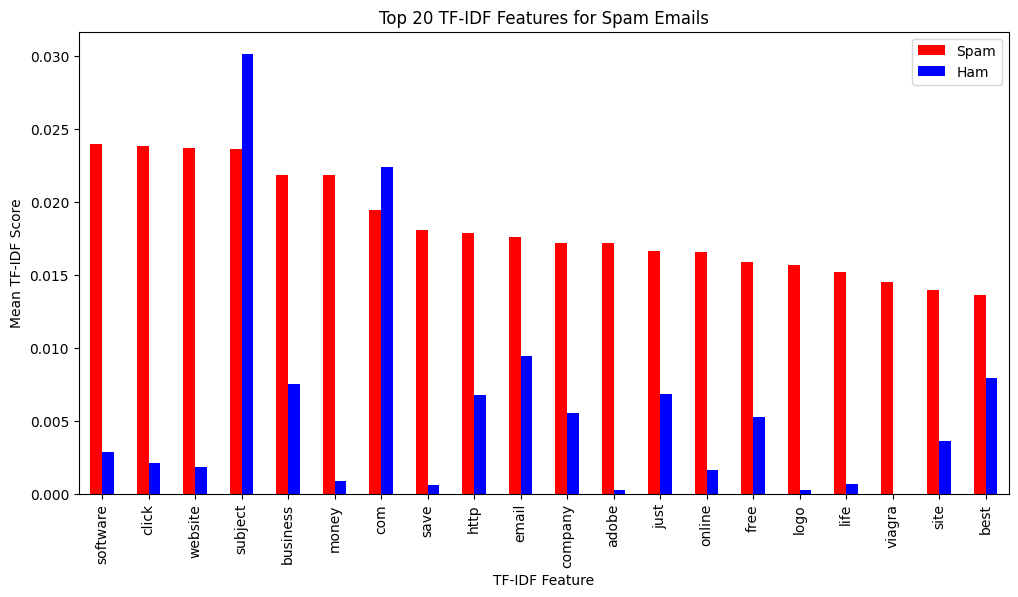

In [24]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english') # Create a TfidfVectorizer object
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])  # Replace 'data['text']' with your actual text data

# Plotting the distribution of TF-IDF features for spam vs. ham
spam_tfidf_mean = X_tfidf[data['spam'] == 1].mean(axis=0).A1
ham_tfidf_mean = X_tfidf[data['spam'] == 0].mean(axis=0).A1
tfidf_data = pd.DataFrame({'Spam': spam_tfidf_mean, 'Ham': ham_tfidf_mean}, index=tfidf_vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 6))
tfidf_data.sort_values('Spam', ascending=False).head(20).plot(kind='bar', figsize=(12, 6), color=['red', 'blue'])
plt.title('Top 20 TF-IDF Features for Spam Emails')
plt.xlabel('TF-IDF Feature')
plt.ylabel('Mean TF-IDF Score')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


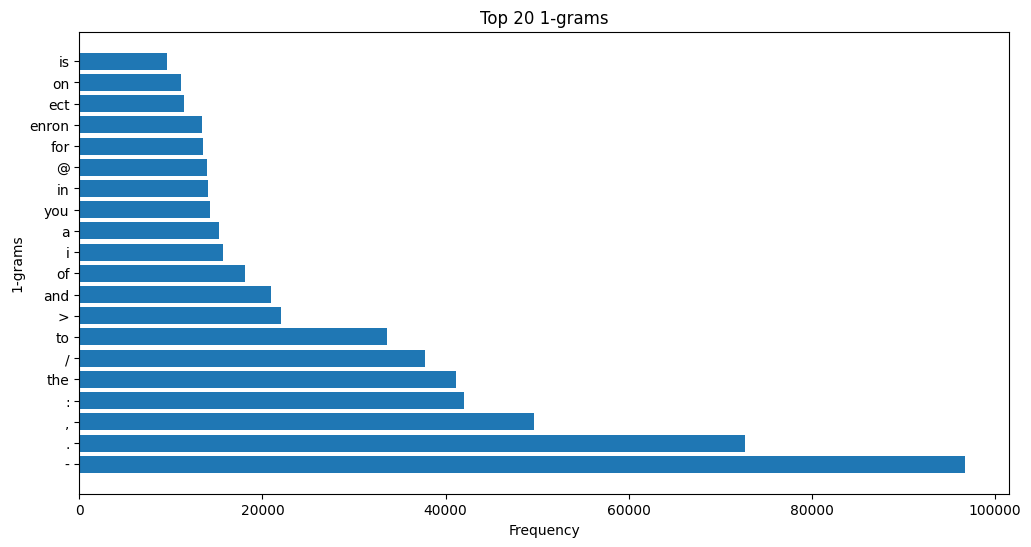

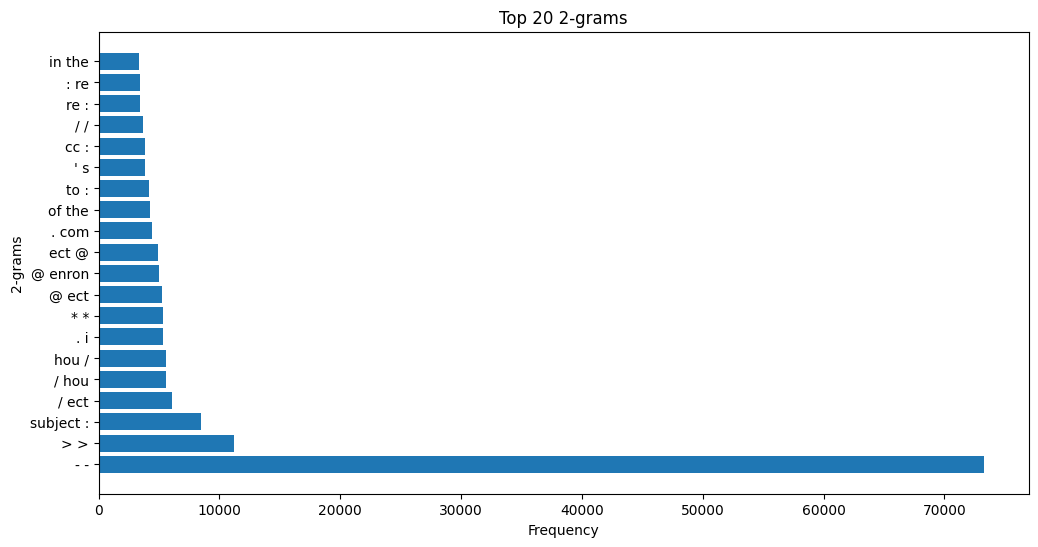

In [28]:
!pip install nltk

import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Download the 'punkt' resource
nltk.download('punkt')

def plot_top_ngrams(text_corpus, n_range=(1, 1), top_n=20):
    """
    Plots the top n-grams from a text corpus.

    Args:
        text_corpus (list of str): A list of text strings.
        n_range (tuple): The range of n-gram values to consider (e.g., (1, 1) for unigrams, (2, 2) for bigrams).
        top_n (int): The number of top n-grams to plot.
    """
    all_ngrams = []
    for text in text_corpus:
        tokens = nltk.word_tokenize(text)
        for n in range(n_range[0], n_range[1] + 1):
            ngram_list = list(ngrams(tokens, n))
            all_ngrams.extend([' '.join(ngram) for ngram in ngram_list])

    top_ngrams = Counter(all_ngrams).most_common(top_n)

    plt.figure(figsize=(12, 6))
    plt.barh([ngram[0] for ngram in top_ngrams], [ngram[1] for ngram in top_ngrams])
    plt.xlabel('Frequency')
    plt.ylabel('{}-grams'.format(n_range[1]))
    plt.title('Top {} {}-grams'.format(top_n, n_range[1]))
    plt.show()

# Now you can call the function like this:
plot_top_ngrams(data[data['spam'] == 0]['text'], (1, 1))
plot_top_ngrams(data[data['spam'] == 0]['text'], (2, 2))

<ipython-input-29-282958d842f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='spam', y='text_length', palette='Set3')


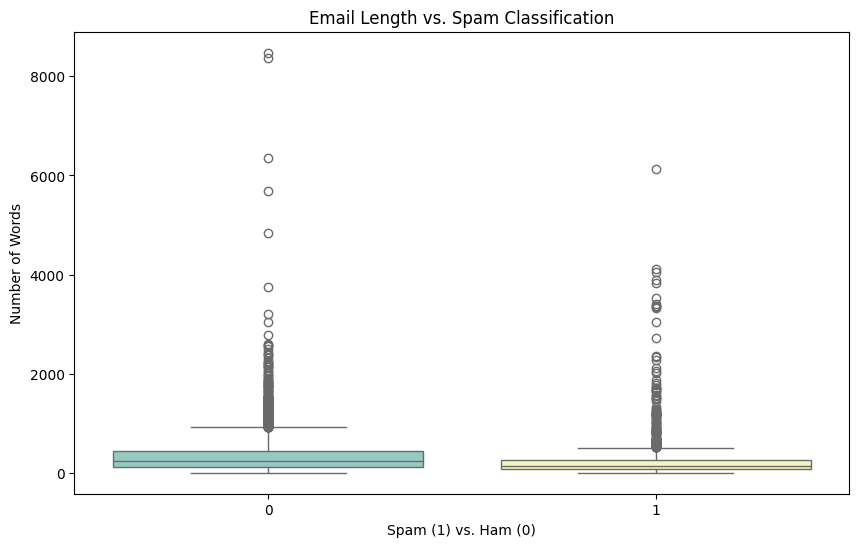

In [29]:
# Analyzing email length vs. spam classification
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='spam', y='text_length', palette='Set3')
plt.title('Email Length vs. Spam Classification')
plt.xlabel('Spam (1) vs. Ham (0)')
plt.ylabel('Number of Words')
plt.show()

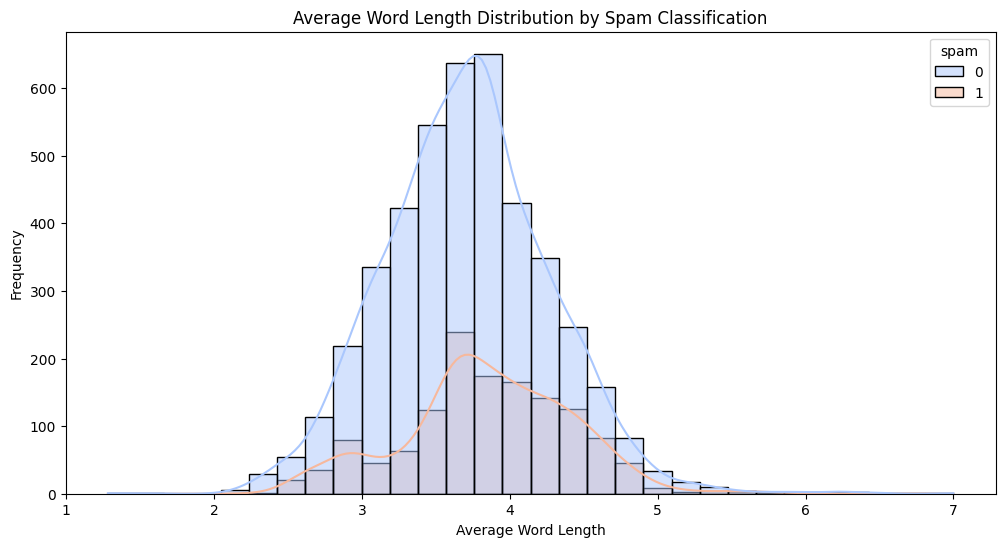

In [30]:
# Additional insight: Distribution of average word length in emails
data['avg_word_length'] = data['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if x.split() else 0)
plt.figure(figsize=(12, 6))
sns.histplot(data, x='avg_word_length', hue='spam', bins=30, kde=True, palette='coolwarm')
plt.title('Average Word Length Distribution by Spam Classification')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

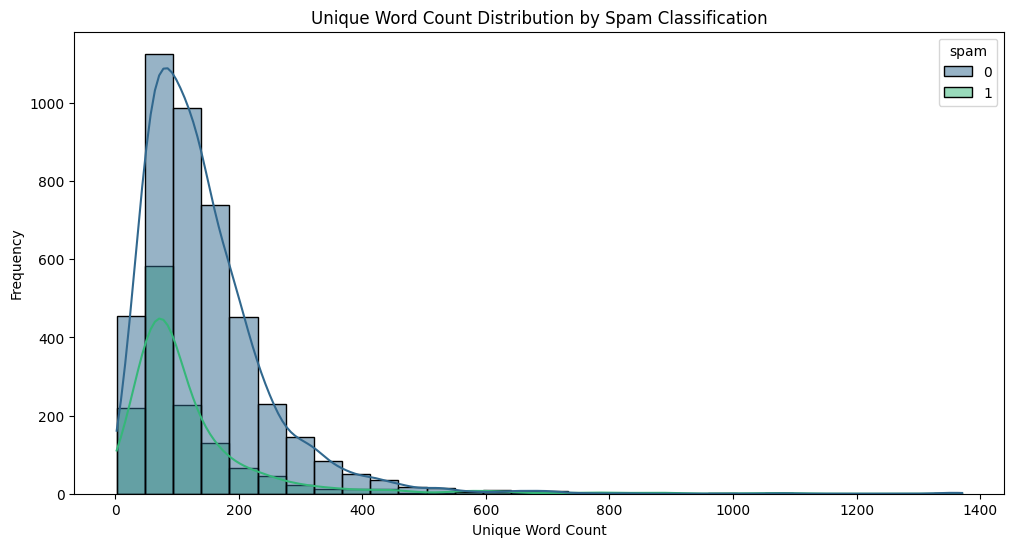

In [31]:
# Additional visualization: Distribution of unique word counts in emails
data['unique_word_count'] = data['text'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(12, 6))
sns.histplot(data, x='unique_word_count', hue='spam', bins=30, kde=True, palette='viridis')
plt.title('Unique Word Count Distribution by Spam Classification')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()